<a href="https://colab.research.google.com/github/khushi1315/Machine-Learning_Practice/blob/main/SupportVectorRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Importing the dataset

In [ ]:
df=pd.read_csv('Position_Salaries.csv')
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [ ]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
y=np.reshape(y,(len(y),1))
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
x=sc_x.fit_transform(x)
#we will scale both with different scaler
sc_y=StandardScaler()
y=sc_y.fit_transform(y)


In [ ]:
print(x)


[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf') #non-linear
regressor.fit(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [ ]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualising the SVR results

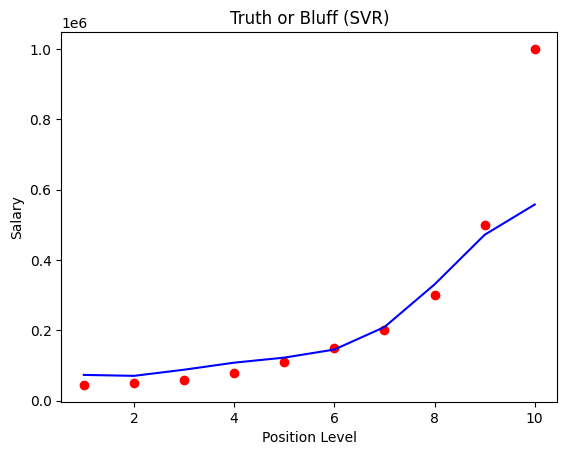

In [ ]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x).reshape(-1,1)),
         color='blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

/tmp/ipython-input-21-458604478.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.01)


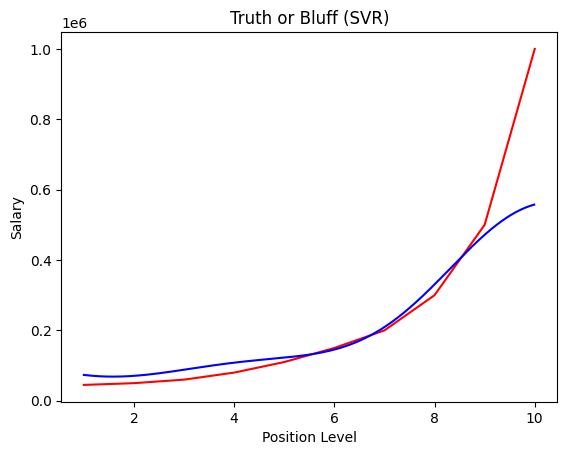

In [21]:
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='r')
x_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), 0.01)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.plot(
    x_grid,
    sc_y.inverse_transform(regressor.predict(sc_x.transform(x_grid)).reshape(-1, 1)),
    color='blue'
)

plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()
